In [271]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import math
"""For this simulation 1 Unit = 5 Meters meaning that the size of the road 200 is 200 Units so 1000 Meters"""

class Road:

    def __init__(self, size=200, number_of_cars=30): # called upon start
        self.size = size
        self.road = self.create_road(size)
        self.car_list = self.place_cars(number_of_cars) # Makes a list of car instances

    def place_cars(self, number_of_cars):
        car_list = []
        for num in range(number_of_cars):
            if num == 0:
                car = Car(num, num)
                car_list.append((car,num))
            else:
                car = Car(num *6.6, num)
                # print(car.position)
                car_list.append((car, num))  # Give them a tracking number, comrade.
        return car_list

    def create_road(self, size):
        return np.arange(size)  # Returns evenly spaced road size... I don't think this does anything though...

    def check_car_pos(self, check_car):
        selected_car = [self.car_list[number] for number, item in enumerate(
            self.car_list) if item[1] == check_car]
        # print(selected_car[0][1])
        return selected_car[0] # Gets the car instance for the car you called it with


class Car:

    def __init__(self, position=0, car_num=0):
        self.position = position
        self.size = 5  # Car size not really used due to design of code
        self.accel = .4 # .4 units * 5 = 2 meters
        self.record_speed = []
        self.car_num = car_num  # Brothers, why do we fight
        self.max_speed = 33.3  # Speed limit in units 24000 units * 5 = 120000
        self.track = []  # Tracking list
        self.lap = 0
        self.speed = 0  # Car speed

    """def __str__(self):
        return str(self.position)"""

    def accelerate(self):
        self.speed += self.accel

    def stop(self):
        self.speed = 0

    def slow(self):
        if self.speed > .4:
            self.speed -= .4

    def move(self):
        # print(self.speed)
        self.position += self.speed
        self.position = self.position % 200

    def car_in_front(self):
        return self.car_num + 1  # Checks for car in front via tracking number

    def track_progress(self):
        self.track.append(self.position % 200)  # PJ showed us this... Saved a few lines of code... Pretty sweet
        self.record_speed.append(self.speed)

    """def set_pos_to_value(self, position=0):
        self.position = self.position % 200
        print("Self.posistion", self.position)"""

road = Road()
"""print(road.road)
print(road.car_list)
print(road.car_list[5])
print(road.check_car_pos(0))
first_car = road.check_car_pos(0)
print("First Car", first_car[0].position)
second_car = road.check_car_pos(road.car_list[0][0].car_in_front())
print("Second Car", second_car[0].position)
distance = second_car[0].position - first_car[0].position
print(distance)
"""


def run_sim():
    times = 0
    # timeout = time.time() + 60
    # print(road.size)
    for _ in range(120):
        """if times >= 60:  # How many times to run the sim... Used as time
            break
        times += 1"""
        # if time.time() > timeout:
        for car in road.car_list:  # Runs through each car from front to back
            # print("Car", car)
            car[0].track_progress()
            chance = random.randint(1, 10)  # Random chance to slow
            first_car = car[0].position
            # The try and except are to deal with the first car
            # it can't just add 1 to the tracking number so if an error is thrown
            # it knows it's the first car and it then goes to the last car
            try:
                second_car = road.check_car_pos(car[0].car_in_front())[0].position
                distance = second_car - first_car
                speed = car[0].speed * 5
                if speed >= distance:
                    pass
                elif speed != car[0].max_speed or not speed > car[0].max_speed:
                    car[0].accelerate()
                #print("Car position", car[0].position)
            except:
                second_car = road.car_list[0][0].position
                distance = second_car - first_car
                speed = car[0].speed * 5
                #print("Front Car Speed", speed)
                #print("Front Car Distance", math.fabs(distance) )
                #print("Front Car Location", car[0].position)
                if speed >= math.fabs(distance):
                    pass
                elif speed != car[0].max_speed or not speed > car[0].max_speed:
                    car[0].accelerate()
            # print(car[0].position)
            if chance == 1:  # Random Chance to slow
                car[0].slow()
            car[0].move()
            # returns(tracked cars, time, and car speeds)
    return ([[(_*5) for _ in car[0].track]  for car in road.car_list], 120, [[5*_ for _ in car[0].record_speed] for car in road.car_list])


data = run_sim()
#print("This is your data", data[0])
# print("Compare", data[0])
# print("This is your iterations", data[1])



In [272]:
import statistics as stat

In [273]:
metersec = stat.stdev([stat.mean(car) for car in data[2]])
optimal = metersec * 3.6  # 1 meter per second = 3.6 kilometers per hour according to the internet
print("Optimal Speed is", int(optimal))
print("Generally Comes out to 65-75")

Optimal Speed is 42
Generally Comes out to 65-75


In [274]:
import matplotlib.pyplot as plt # Importing matplotlib

In [275]:
%matplotlib inline  
# Tells the graphs to appear in ipython

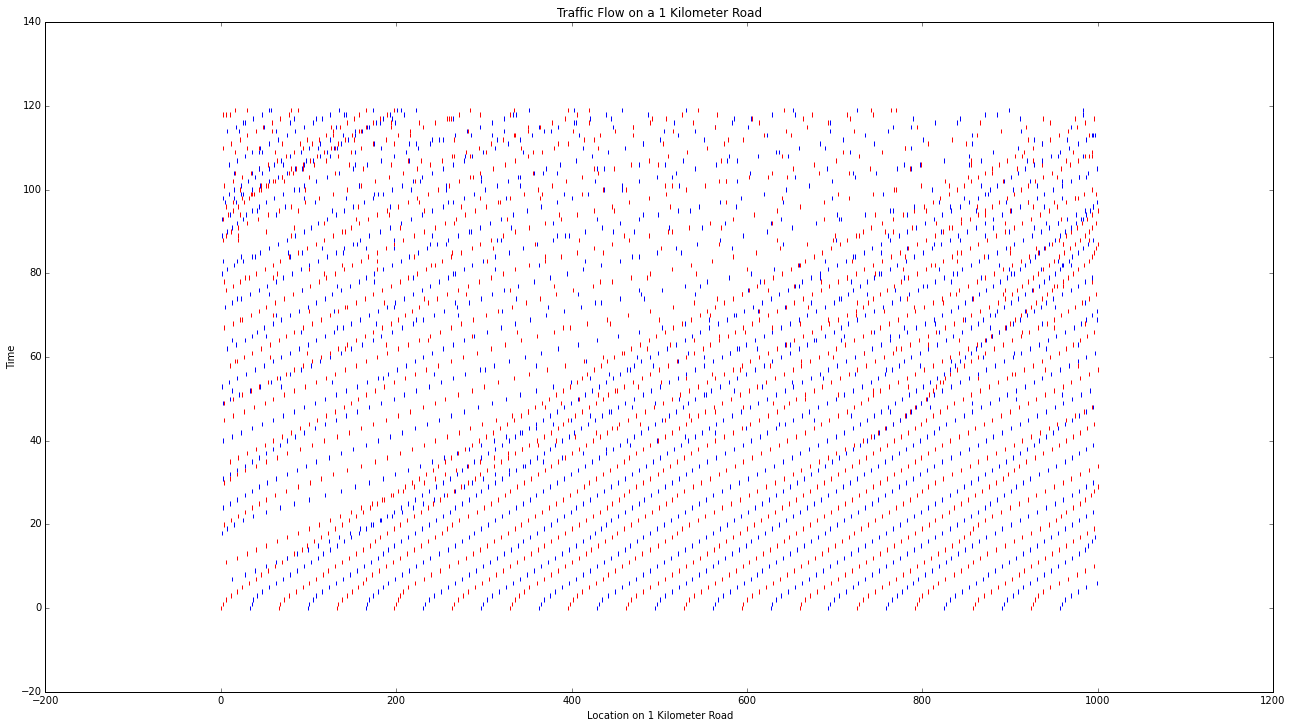

In [277]:
y = np.array([[_]*30 for _ in range(120)])  # Courtesy of Joel, will keep time and the data the same size
# print(y)
# y = np.array(data[2])  # I noticed Lance did it according to speed so I thought I would see what it looks like
clean = np.array(data[0])  # Locations
x = clean.transpose()
#print(x)
"""#print(x.size)
print(y.size)
print(x.shape)
print(y.shape)"""
plt.xlabel("Location on 1 Kilometer Road")
plt.ylabel("Time")  # Heals all wounds?
plt.title("Traffic Flow on a 1 Kilometer Road")
plt.rcParams['figure.figsize'] = 22, 12  # Found this handy trick in PJ's Code, Generates a normal graph the first time
plt.scatter(x, y, c=['r','b'], marker = '|')  # Quick Scatter
plt.show()